# Usando funciones:

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def interpolate_lag(x,data,n):
    sum = 0
    for i in range(0,n+1):
        sum += L(i,n,x,data)*data[i,1]
    return sum

def L(i,n,x,data):
    prod = 1
    for j in range(n+1):
        if j!=i:
            prod *= (x-data[j,0])/(data[i,0]-data[j,0])
    return prod

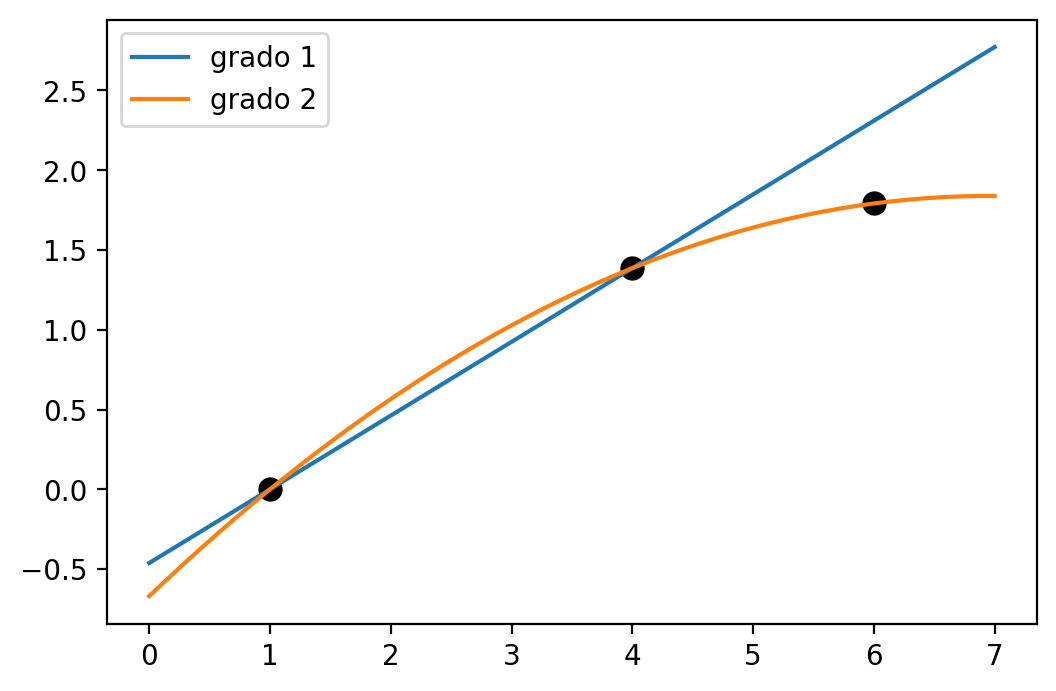

In [17]:
x_axis = np.linspace(0,7,50)

plt.figure(dpi=200)
plt.scatter(A[:,0],A[:,1],color='black',s=60)
plt.plot(x_axis,[interpolate_lag(x,A,1) for x in x_axis],label='grado 1')
plt.plot(x_axis,[interpolate_lag(x,A,2) for x in x_axis],label='grado 2')
plt.legend(loc='best')
plt.show()

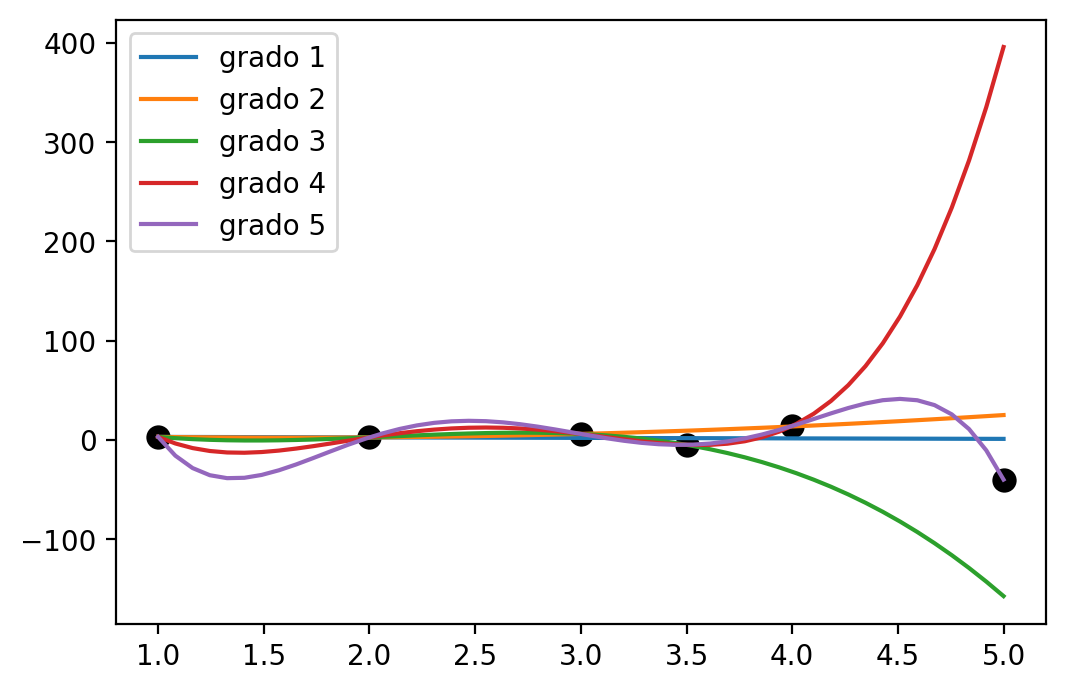

In [36]:
A = np.array([[1,3],[2,2.5],[3,6],[3.5,-5],[4,14],[5,-40]])

x_axis = np.linspace(np.min(A,axis=0)[0],np.max(A,axis=0)[0],50)

plt.figure(dpi=200)
plt.scatter(A[:,0],A[:,1],color='black',s=60)
for k in range(1,A.shape[0]):
    plt.plot(x_axis,[interpolate_lag(x,A,k) for x in x_axis],label=f'grado {k}')
plt.legend(loc='best')
plt.show()

# Usando la clase

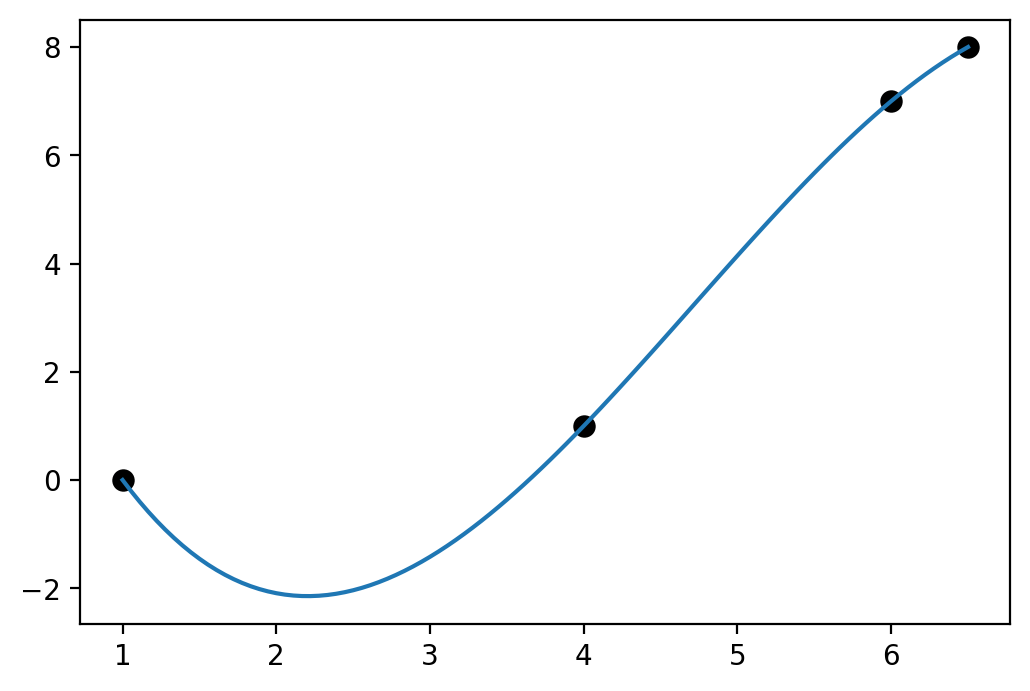

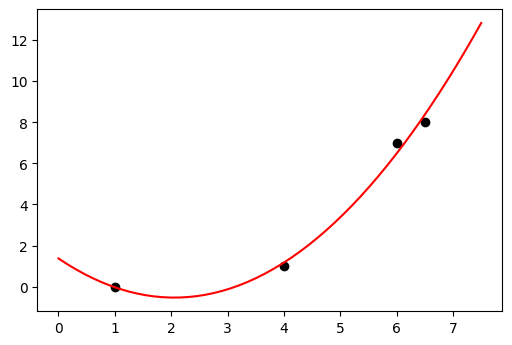

Error respecto al promedio: 50.0
Error cuadrático: 0.437988826815645
S_r<S_t : True
Desviación estandar de los datos y_i: 4.08248290463863
Error estandar de la estimación: 0.6618072429458935
S_r<S_t : True
Coeficiente de determinación: 0.991240223463687


In [3]:
from interpolacion_aproximacion import RegresionLineal, InterpolacionLagrange
import numpy as np

A = np.array([[1,0],[4,1],[6,7],[6.5,8]])

interpolacion = InterpolacionLagrange()
interpolacion.fit(data=A,grado=3)
interpolacion.plot()

rl = RegresionLineal(grado=2)
rl.fit(datos=np.transpose(A))
rl.plot()
rl.metrics()

Datos:
[[3.  2.5]
 [4.5 1. ]
 [7.  2.5]
 [9.  0.5]]
Coeficientes:
[[-2.33660827e-15 -1.00000000e+00  5.50000000e+00]
 [ 6.40000000e-01 -6.76000000e+00  1.84600000e+01]
 [-1.60000000e+00  2.46000000e+01 -9.13000000e+01]]


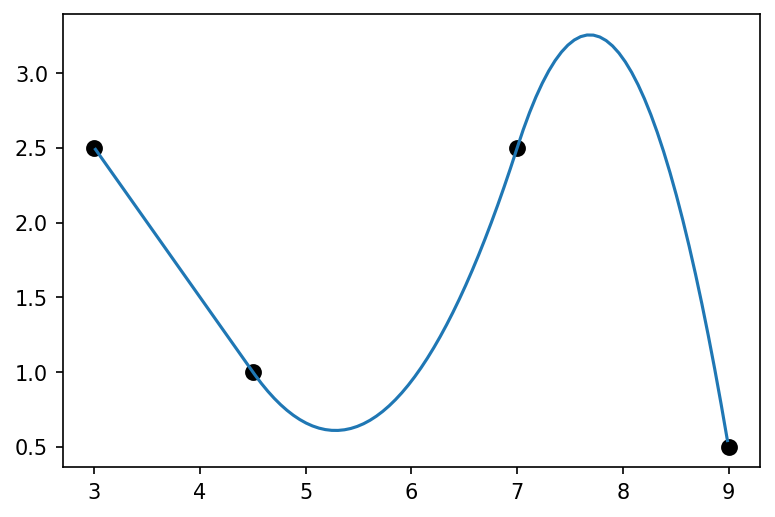

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from interpolacion_aproximacion import Splines

X = np.array([[3,2.5],[4.5,1],[7,2.5],[9,0.5]])
# X = np.array([[3,2.5],[4.5,1],[5,3.5],[7,8],[9,0.5]])

print(f"Datos:\n{X}")

spl = Splines()
coefs = spl.fit(X)
print(f"Coeficientes:\n{coefs}")
spl.plot()

In [2]:
print(f"Matriz del sistema:\n{spl.A}")
print(f"Vector b:\n{spl.b}")

Matriz del sistema:
[[  9.     3.     1.     0.     0.     0.     0.     0.     0.  ]
 [ 20.25   4.5    1.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.    20.25   4.5    1.     0.     0.     0.  ]
 [  0.     0.     0.    49.     7.     1.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.    49.     7.     1.  ]
 [  0.     0.     0.     0.     0.     0.    81.     9.     1.  ]
 [  9.     1.     0.    -9.    -1.     0.     0.     0.     0.  ]
 [  0.     0.     0.    14.     1.     0.   -14.    -1.     0.  ]
 [  1.     0.     0.     0.     0.     0.     0.     0.     0.  ]]
Vector b:
[2.5 1.  1.  2.5 2.5 0.5 0.  0.  0. ]
